<a href="https://colab.research.google.com/github/aygunthebard/exc/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# We created a pandas dataframe with cotents of a long period weather report
data1 = pd.read_csv("/content/MeteoStat_Ankara_2016_2024.csv")
data1

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2016-01-01,-7.1,-11.3,-2.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,-7.1,-10.7,-3.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,-3.3,-7.7,-0.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,1.3,-2.1,NaN,0.8,10.0,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,4.4,2.1,5.9,10.4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3283,2024-12-27,4.3,-0.1,5.6,1.5,NaN,15.0,6.8,NaN,1017.1,NaN
3284,2024-12-28,5.1,3.2,8.4,4.8,NaN,53.0,9.3,NaN,1019.3,NaN
3285,2024-12-29,4.8,0.5,7.1,0.0,NaN,53.0,11.1,NaN,1021.7,NaN
3286,2024-12-30,4.0,3.0,5.4,0.0,NaN,26.0,13.1,NaN,1023.4,NaN


In [40]:
# We dropped some columns because we will analyse temperature datas(tavg , tmin and tmax), so other columns were unneccasry here
data1 = data1.drop(['prcp','snow',	'wdir',	'wspd',	'wpgt',	'pres',	'tsun'],axis = 1)
data1

,date,tavg,tmin,tmax
0,2016-01-01,-7.1,-11.3,-2.2
1,2016-01-02,-7.1,-10.7,-3.2
2,2016-01-03,-3.3,-7.7,-0.4
3,2016-01-04,1.3,-2.1,NaN
4,2016-01-05,4.4,2.1,5.9
...,...,...,...,...
3283,2024-12-27,4.3,-0.1,5.6
3284,2024-12-28,5.1,3.2,8.4
3285,2024-12-29,4.8,0.5,7.1
3286,2024-12-30,4.0,3.0,5.4


In [41]:
data1.dtypes

,0
date,object
tavg,float64
tmin,float64
tmax,float64


In [50]:
# We are looking for the hottest day in 2020, so we created a new dataframe with the data from 2020
data2020 = data1.loc[data1["date"].str.contains("2020"),:]
data2020

,date,tavg,tmin,tmax
1461,2020-01-01,3.2,NaN,NaN
1462,2020-01-02,1.8,NaN,NaN
1463,2020-01-03,1.1,NaN,NaN
1464,2020-01-04,0.4,-1.9,NaN
1465,2020-01-05,1.7,NaN,NaN
...,...,...,...,...
1822,2020-12-27,6.7,2.6,13.1
1823,2020-12-28,6.3,2.6,11.3
1824,2020-12-29,6.4,1.7,12.8
1825,2020-12-30,7.6,3.3,13.8


In [51]:
# With describe command we found the maximum temperature in this dataframe
data2020.describe()

,tavg,tmin,tmax
count,366.000000,276.000000,40.000000
mean,14.133880,9.467754,11.760000
std,8.845586,7.597464,4.839464
min,-4.700000,-11.800000,2.700000
25%,6.700000,3.300000,9.675000
50%,13.150000,10.300000,11.850000
75%,22.800000,16.200000,13.025000
max,30.200000,21.500000,33.000000


In [61]:
# Now that we learned the maximum temperature, we can create filter with this information and by using that filter we can find the date of hottest day of 2020
f2020 = (data2020['tmax'] == data2020['tmax'].max())
f2020

,tmax
1461,False
1462,False
1463,False
1464,False
1465,False
...,...
1822,False
1823,False
1824,False
1825,False


In [67]:
# By putting the filter into our dataframe we find the what we are looking for
hottest_day_of_2020 = data2020[f2020]
hottest_day_of_2020

,date,tavg,tmin,tmax
1698,2020-08-25,25.5,17.3,33.0


In [80]:
# For getting the average of average temperatures of 20 days before and after the hottest day of 2020: We subtract and add 20 to index of that day, got tavg column of those days, and get the mean of these values.
avg_of_41_days = (data1.loc[1678:1718,['tavg']]).mean()
avg_of_41_days

,0
tavg,25.290244


In [88]:
# We can define a function for getting hottest days of the years
def hottest_day(year):
    the_year = data1.loc[data1["date"].str.contains(year),:]
    f_year = (the_year['tmax'] == the_year['tmax'].max())
    hottest_day_of_year = the_year[f_year]
    return hottest_day_of_year


In [115]:
hottest_days = hottest_day("2016"),hottest_day("2017"),hottest_day("2018"),hottest_day("2019"),hottest_day("2020"),hottest_day("2021"),hottest_day("2022"),hottest_day("2023"),hottest_day("2024")
hottest_days

(           date  tavg  tmin  tmax
 197  2016-07-16  29.8  19.7  38.1
 198  2016-07-17  30.8  22.2  38.1,
            date  tavg  tmin  tmax
 549  2017-07-03  30.4  19.1  38.3,
            date  tavg  tmin  tmax
 913  2018-07-02  25.2  17.9  32.6,
             date  tavg  tmin  tmax
 1175  2019-03-21   9.8   3.1  16.0,
             date  tavg  tmin  tmax
 1698  2020-08-25  25.5  17.3  33.0,
             date  tavg  tmin  tmax
 2026  2021-07-19  32.1  24.8  39.3,
             date  tavg  tmin  tmax
 2427  2022-08-24  28.6  21.4  37.1,
             date  tavg  tmin  tmax
 2783  2023-08-15  33.3  25.6  40.5,
             date  tavg  tmin  tmax
 3155  2024-08-21  29.2  20.3  37.1)

In [142]:
# In this data set the year 2019 seemed a little bit odd so we take a deeper look
year2019 = data1.loc[data1["date"].str.contains("2019"),:]
year2019

,date,tavg,tmin,tmax
1096,2019-01-01,-1.2,-2.7,NaN
1097,2019-01-02,1.4,-1.6,NaN
1098,2019-01-03,5.4,2.7,NaN
1099,2019-01-04,3.3,NaN,NaN
1100,2019-01-05,0.4,NaN,NaN
...,...,...,...,...
1456,2019-12-27,4.5,NaN,NaN
1457,2019-12-28,2.7,NaN,NaN
1458,2019-12-29,2.4,1.0,NaN
1459,2019-12-30,3.1,0.9,NaN


In [143]:
# And saw that probably the given data of this year had some errors. In the D section, this can cause an error.
year2019.describe()

,tavg,tmin,tmax
count,365.000000,270.000000,3.000000
mean,13.689315,8.873704,10.600000
std,8.258277,7.089529,5.610704
min,-6.400000,-10.400000,4.800000
25%,6.200000,2.725000,7.900000
50%,13.500000,9.500000,11.000000
75%,21.200000,15.375000,13.500000
max,31.100000,21.100000,16.000000


In [144]:
# We can also define an function for calculating the average of averages of 40 days surrounding the hottest day
def avg_41(spot):
    spot_index = spot.index[0]
    avg_z = (data1.loc[(spot_index) - 20:(spot_index)+20,['tavg']]).mean()
    return avg_z

In [145]:
avg_41(hottest_day("2020"))

,0
tavg,25.290244


In [157]:
wdata = avg_41(hottest_day("2016")),avg_41(hottest_day("2017")),avg_41(hottest_day("2018")),avg_41(hottest_day("2019")),avg_41(hottest_day("2020")),avg_41(hottest_day("2021")),avg_41(hottest_day("2022")),avg_41(hottest_day("2023")),avg_41(hottest_day("2024"))
warray = np.array(wdata)
warray

array([[25.23902439, 23.77804878, 23.15853659,  8.02439024, 25.2902439 ,
        25.7902439 , 24.73902439, 27.26097561, 25.0875    ]])

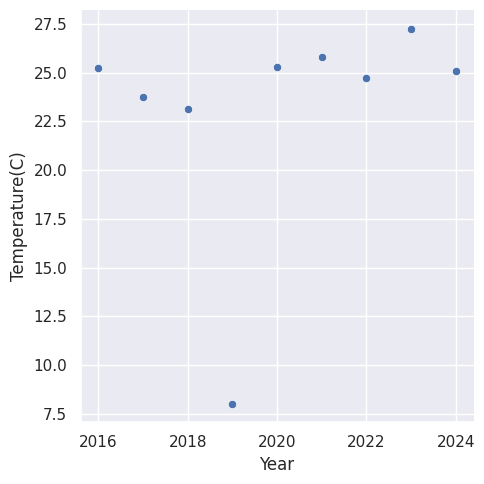

In [193]:
Year = np.arange(2016,2025,1)
Temperature =  warray.flatten()
sns.relplot(x = Year , y = Temperature).set_axis_labels("Year", "Temperature(C)")
sns.set_style("ticks")
sns.set_theme()